In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

In [2]:
df = pd.read_csv('dataset/credit.csv')

In [3]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [4]:
df.shape

(1000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [6]:
df['checking_balance'].value_counts()

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64

In [7]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature])
        
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [8]:
df.dtypes

checking_balance        category
months_loan_duration       int64
credit_history          category
purpose                 category
amount                     int64
savings_balance         category
employment_duration     category
percent_of_income          int64
years_at_residence         int64
age                        int64
other_credit            category
housing                 category
existing_loans_count       int64
job                     category
dependents                 int64
phone                   category
default                 category
dtype: object

In [9]:
print(df['checking_balance'].value_counts())
print(df['credit_history'].value_counts())
print(df['purpose'].value_counts())
print(df['savings_balance'].value_counts())
print(df['employment_duration'].value_counts())
print(df['other_credit'].value_counts())
print(df['housing'].value_counts())
print(df['job'].value_counts())
print(df['phone'].value_counts())
print(df['default'].value_counts())

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
none     814
bank     139
store     47
Name: other_credit, dtype: int64
own      713
rent     179
other    108
Name: housing, dtype: int64
skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64
no     596
yes    404
Name: phone, dtype: int64
no     700
yes  

In [10]:
df['purpose'] = df['purpose'].replace({'car0': 'car'})

In [11]:
replace_ = {
    "checking_balance": {"< 0 DM": 1, "1 - 200 DM": 2 ,"> 200 DM": 3 ,"unknown":-1},
    "credit_history": {"critical": 1, "poor":2 , "good": 3, "very good": 4,"perfect": 5},
    "savings_balance": {"< 100 DM": 1, "100 - 500 DM":2 , "500 - 1000 DM": 3, "> 1000 DM": 4,"unknown": -1},
    "employment_duration": {"unemployed": 1, "< 1 year": 2 ,"1 - 4 years": 3 ,"4 - 7 years": 4 ,"> 7 years": 5},
    "phone": {"no": 1, "yes": 2 },
    "default": {"no": 0, "yes": 1 } 
}

oneHotCols=["purpose","housing","other_credit","job"]

In [12]:
df = df.replace(replace_)
df = pd.get_dummies(df, columns=oneHotCols)
df.head(10)

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
5,-1,36,3,9055,-1,3,2,4,35,1,...,1,0,0,0,1,0,0,0,0,1
6,-1,24,3,2835,3,5,3,4,53,1,...,0,1,0,0,1,0,0,1,0,0
7,2,36,3,6948,1,3,2,2,35,1,...,0,0,1,0,1,0,1,0,0,0
8,-1,12,3,3059,4,4,2,4,61,1,...,0,1,0,0,1,0,0,0,0,1
9,2,30,1,5234,1,1,4,2,28,2,...,0,1,0,0,1,0,1,0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   checking_balance              1000 non-null   category
 1   months_loan_duration          1000 non-null   int64   
 2   credit_history                1000 non-null   category
 3   amount                        1000 non-null   int64   
 4   savings_balance               1000 non-null   category
 5   employment_duration           1000 non-null   category
 6   percent_of_income             1000 non-null   int64   
 7   years_at_residence            1000 non-null   int64   
 8   age                           1000 non-null   int64   
 9   existing_loans_count          1000 non-null   int64   
 10  dependents                    1000 non-null   int64   
 11  phone                         1000 non-null   category
 12  default                       1000 non-null   cat

In [14]:
X = df.drop('default', axis=1)
y = df['default']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [16]:
dtree = DecisionTreeClassifier(criterion='gini', random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [17]:
dtree.score(X_train, y_train)

1.0

In [18]:
dtree.score(X_test, y_test)

0.6766666666666666

In [19]:
dtreeR = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
dtreeR.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [20]:
dtreeR.score(X_train, y_train)

0.7528571428571429

In [21]:
dtreeR.score(X_test, y_test)

0.7433333333333333

In [22]:
pd.DataFrame(dtreeR.feature_importances_, columns=['Imp'], index=X_train.columns)

,Imp
checking_balance,0.492510
months_loan_duration,0.169806
credit_history,0.166109
amount,0.000000
savings_balance,0.064467
employment_duration,0.000000
percent_of_income,0.000000
years_at_residence,0.000000
age,0.000000
existing_loans_count,0.000000


<AxesSubplot:>

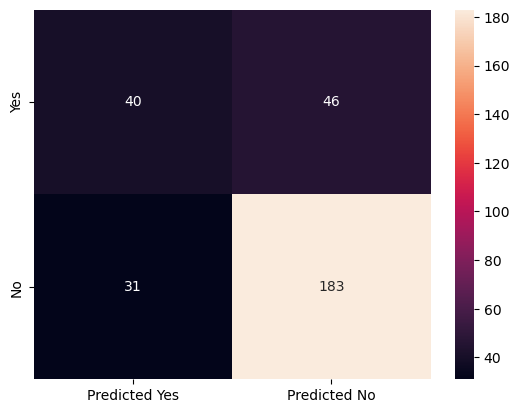

In [23]:
y_predict = dtreeR.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index=['Yes', 'No'], columns=['Predicted Yes', 'Predicted No'])
sns.heatmap(df_cm, annot=True, fmt='g')

In [29]:
from sklearn.ensemble import BaggingClassifier

# bgcl = BaggingClassifier(base_estimator=dtree, n_estimators=50, random_state=1)
bgcl = BaggingClassifier(n_estimators=50, random_state=1)
bgcl.fit(X_train, y_train)

BaggingClassifier(n_estimators=50, random_state=1)

In [30]:
bgcl.score(X_train, y_train)

1.0

In [31]:
bgcl.score(X_test, y_test)

0.7633333333333333

<AxesSubplot:>

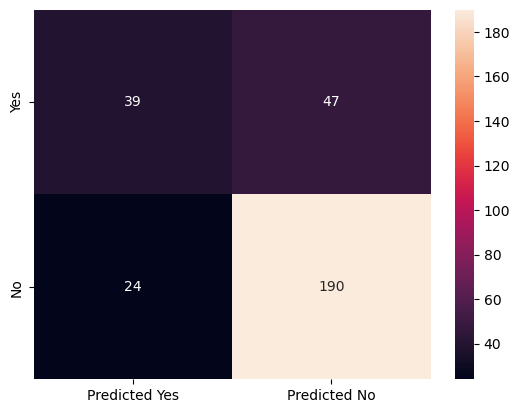

In [32]:
y_predict = bgcl.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index=['Yes', 'No'], columns=['Predicted Yes', 'Predicted No'])
sns.heatmap(df_cm, annot=True, fmt='g')

In [33]:
from sklearn.ensemble import AdaBoostClassifier

adcl = AdaBoostClassifier(n_estimators=10, random_state=1)
adcl.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=10, random_state=1)

In [35]:
adcl.score(X_test, y_test)

0.74

<AxesSubplot:>

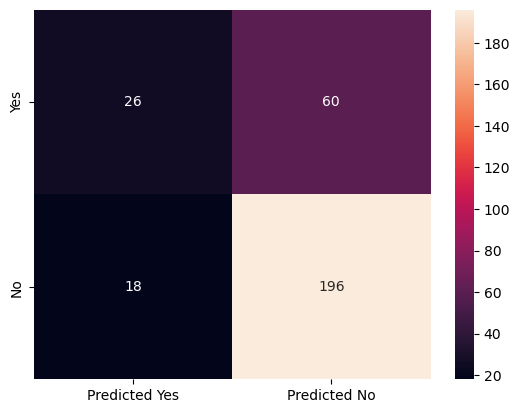

In [34]:
y_predict = adcl.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index=['Yes', 'No'], columns=['Predicted Yes', 'Predicted No'])
sns.heatmap(df_cm, annot=True, fmt='g')

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gdcl = GradientBoostingClassifier(n_estimators=50, random_state=1)
gdcl.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=1)

In [47]:
gdcl.score(X_test, y_test)

0.7466666666666667

<AxesSubplot:>

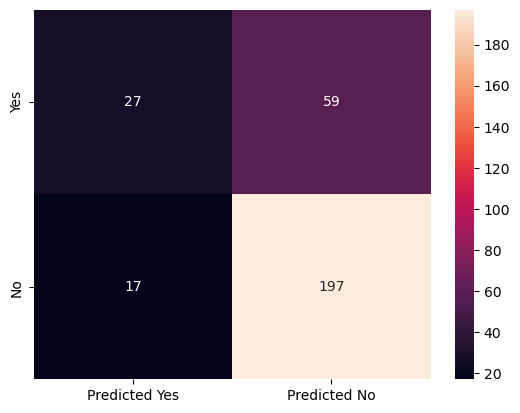

In [48]:
y_predict = gdcl.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index=['Yes', 'No'], columns=['Predicted Yes', 'Predicted No'])
sns.heatmap(df_cm, annot=True, fmt='g')

In [52]:
from xgboost import XGBClassifier

xgcl = XGBClassifier(n_estimators=50, random_state=1)
xgcl.fit(X_train, y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:checking_balance: category, credit_history: category, savings_balance: category, employment_duration: category, phone: category

In [ ]:
xgcl.score(X_test, y_test)

In [54]:
y_predict = xgcl.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index=['Yes', 'No'], columns=['Predicted Yes', 'Predicted No'])
sns.heatmap(df_cm, annot=True, fmt='g')

NotFittedError: need to call fit or load_model beforehand

In [55]:
from sklearn.ensemble import RandomForestClassifier

rfcl = RandomForestClassifier(n_estimators=50, random_state=1, max_features=12)
rfcl.fit(X_train, y_train)

RandomForestClassifier(max_features=12, n_estimators=50, random_state=1)

In [56]:
rfcl.score(X_test, y_test)

0.7566666666666667

<AxesSubplot:>

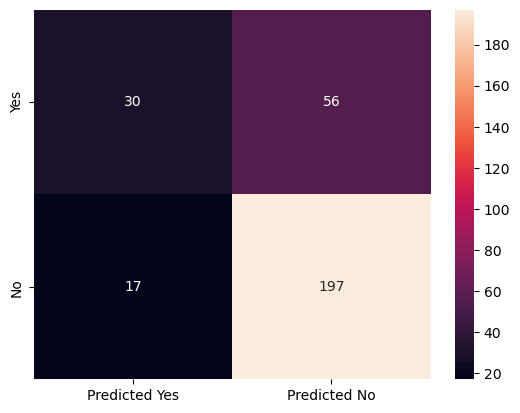

In [57]:
y_predict = rfcl.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index=['Yes', 'No'], columns=['Predicted Yes', 'Predicted No'])
sns.heatmap(df_cm, annot=True, fmt='g')